<a href="https://colab.research.google.com/github/SimonKato/CAP4621/blob/master/CAP4621_Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# imports
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import glob

In [2]:
#load in data from our CycleGAN

# mount drive : files are in /content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# (real_unmasked, fake_masked) and (fake_unmasked,real_masked)
fake_masked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*fake_B.png')
real_masked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*real_B.png')
fake_unmasked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*fake_A.png')
real_unmasked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*real_A.png')
print("Fake Masked ", fake_masked)
print("Real Masked ",real_masked)
print("Fake Unmasked",fake_unmasked)
print("Real Unmasked",real_unmasked)

Fake Masked  ['/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/leon1_fake_B.png', '/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/simon1_fake_B.png', '/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/victoria1_fake_B.png']
Real Masked  ['/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/leon1_real_B.png', '/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/simon1_real_B.png', '/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/victoria1_real_B.png']
Fake Unmasked ['/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/leon1_fake_A.png', '/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/simon1_fake_A.png', '/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/victoria1_fake_A.png']
Real Unmasked ['/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/leon1_real_A.png', '/content/drive/MyDrive/CAP4621/demo/

<class 'numpy.ndarray'>
(256, 512, 3)


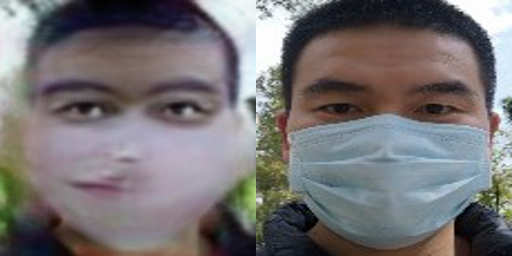

(256, 512, 3)


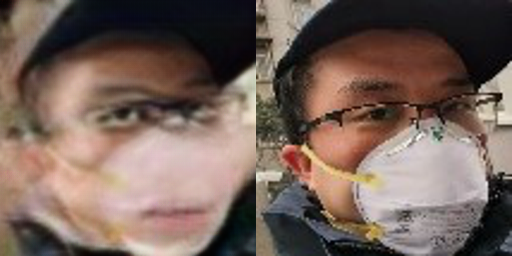

(256, 512, 3)


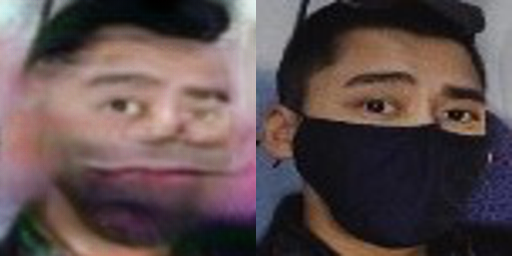

In [14]:
# TODO: pandas dataframe of 
imgs =[]
for i in range(0,len(fake_masked)):
  real = cv2.imread(fake_unmasked[i])
  fake = cv2.imread(real_masked[i])
  new_img = cv2.hconcat([real,fake])
  imgs.append(new_img)

print(type(imgs[0]))
# print(imgs)
for img in imgs:
  print(img.shape)
  cv2_imshow(img)

(256, 512, 3)


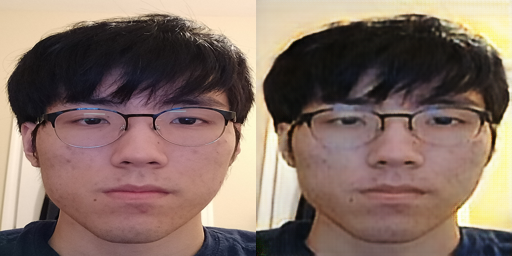

(256, 512, 3)


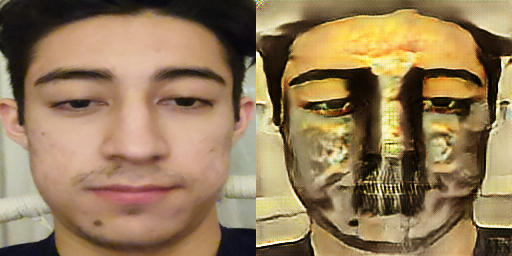

(256, 512, 3)


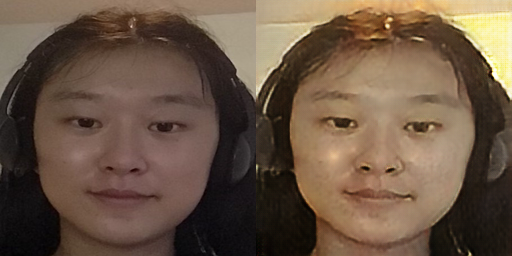

In [16]:
# TODO: pandas dataframe of 
imgs2 =[]
for i in range(0,len(fake_masked)):
  real = cv2.imread(real_unmasked[i])
  fake = cv2.imread(fake_masked[i])
  new_img = cv2.hconcat([real,fake])
  imgs2.append(new_img)

# print(type(imgs[0]))
# print(imgs)
for img in imgs2:
  print(img.shape)
  cv2_imshow(img)

In [ ]:
discriminator = models.Sequential()
# 32 filters, (3x3) kernel size, relu activation, input shape of (256,512,3)
discriminator.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,512,3))) 
discriminator.add(layers.MaxPooling2D((2,2)))
discriminator.add(layers.Conv2D(64,(3,3),activation='relu'))
discriminator.add(layers.MaxPooling2D((2,2)))
discriminator.add(layers.Conv2D(64,(3,3),activation='relu'))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(64,activation='relu'))
discriminator.add(layers.Dense(2))

In [ ]:
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 510, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 255, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 126, 64)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 124, 64)       36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 476160)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
# attempt to compile and train
discriminator.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

results = model.fit(train_images,train_labes,epochs=5,validation_data =(test_images,test_labels)) #need to populate this data